In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from utils.aux_funcs import flatten_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.population import Population

In [2]:
savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/'

In [3]:
pop = Population(savepath)

In [4]:
pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle


In [6]:
unit = pop.data.iloc[591]

<ErrorbarContainer object of 3 artists>

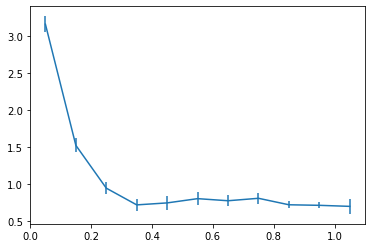

In [7]:
plt.errorbar(unit['hf1_wn_crf_cent'], unit['hf1_wn_crf_tuning'], yerr=unit['hf1_wn_crf_err'])

In [8]:
np.shape(unit['hf1_wn_crf_tuning'])

(11,)

In [20]:
for ind, row in pop.data.iterrows():
    pop.data.at[ind, 'high_contrast_std'] = np.std(row['hf1_wn_crf_tuning'][3:])
    min_contrast = row['hf1_wn_crf_tuning'][0]
    mid_contrast = row['hf1_wn_crf_tuning'][3]
    max_contrast = row['hf1_wn_crf_tuning'][-1]
    pop.data.at[ind, 'SbC_min_mid_mod'] = (min_contrast - mid_contrast) / (min_contrast + mid_contrast)
    pop.data.at[ind, 'SbC_min_max_mod'] = (min_contrast - max_contrast) / (min_contrast + max_contrast)

In [21]:
unit = pop.data.iloc[591]

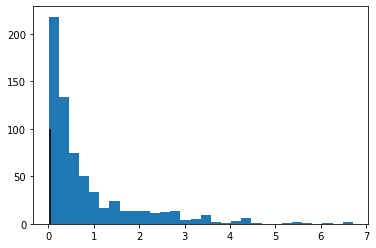

In [22]:
plt.hist(pop.data['high_contrast_std'], bins=30)
plt.vlines(unit['high_contrast_std'], 0,100, color='k')

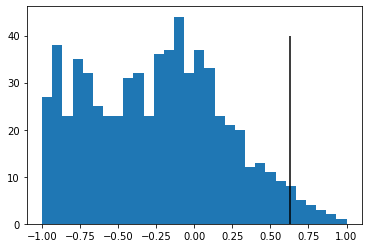

In [24]:
plt.hist(pop.data['SbC_min_mid_mod'], bins=30)
plt.vlines(unit['SbC_min_mid_mod'], 0,40, color='k')

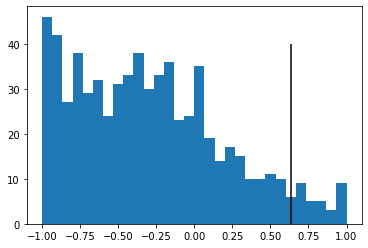

In [25]:
plt.hist(pop.data['SbC_min_max_mod'], bins=30)
plt.vlines(unit['SbC_min_max_mod'], 0,40, color='k')

In [ ]:
plt.hist(pop.data['SbC_min_max_mod'], bins=30)
plt.vlines(unit['SbC_min_max_mod'] - unit['SbC_min_mid_mod'], 0,40, color='k')

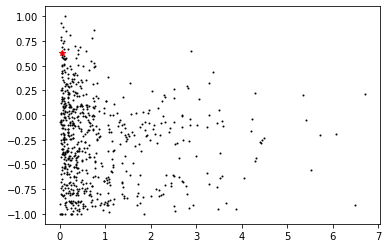

In [26]:
plt.plot(pop.data['high_contrast_std'], pop.data['SbC_min_mid_mod'], 'k.', markersize=2)
plt.plot(unit['high_contrast_std'], unit['SbC_min_mid_mod'], 'r*', markersize=6)